# Imports

In [1]:
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

import timeit


# Leitura do input
### Matriz
o input matriz consiste em um matriz (3x3) onde a primeira linha é a dimensão, e apartir da segunda linha, a matriz de fato (Exemplo do caderno)


In [2]:
def read_matriz_file(path):
    file = open(path,'r')
    dimensao = int(file.readline().replace('\n', ''))
    matriz = []
    rows = file.read().splitlines()
    for line in rows:
        matriz.append(list(map(float,line.split(' '))))

    return dimensao, matriz

### Vetor
O vetor (b) consis apenas em uma linha com os valores (Exemplo do caderno

In [3]:
def read_vetor_file(path):
    file = open(path,'r')
    vetor = list(map(float, file.readline().split(' ')))
    return vetor

# Implementação do método eliminação de Gauss

In [4]:
def eliminacao_gauss(matriz, dimensao, b):
    x = []
    for i in range(dimensao):
        x.append(1)

    for k in range(0, dimensao - 1  ):
        i = k+1
        for i in range(k+1, dimensao ):
            m = matriz[i][k]/matriz[k][k]
            matriz[i][k] = 0
            j = k+1
            for j in range(k+1, dimensao):
                matriz[i][j] = matriz[i][j] - (m * matriz[k][j])

            b[i] = b[i] - m * b[k]


    x[dimensao - 1] = b[dimensao-1] / matriz[dimensao-1][dimensao-1]
    for i in range(dimensao-2, -1, -1):
        soma = 0
        for j in range(i+1, dimensao):
            soma = soma + matriz[i][j] * x[j]

        x[i] = (b[i] - soma)/matriz[i][i]

    return x, matriz

# Gauss Seidel

## Metodo para o cálculo de erro baseado no método apresentado em sala de aula

In [5]:
def calc_erro(x_atual,x_ant, err_list):
    num = []
    for i in range (len(x_atual)):
        num.append(abs(x_atual[i] - x_ant[i]))

    err = max(num)/abs(max(x_atual))
    err_list.append(err)
    return err


## Implementação do método de Gauss Seidel

In [6]:

def gaussSeidel(matriz, b, tol , stop ):
    err_list = []
    x_ant = []
    x_atual = []
    for i in range(len(b)):
        x_ant.append(0) 
        x_atual.append(0)

    k = 1
    while(k <= stop):
        for i in range(0,len(b)):
            alpha = 0
            for j in range(0, i):
                alpha = alpha + matriz[i][j] * x_atual[j]
            for j in range(i+1, len(b)):
                alpha = alpha + matriz[i][j] * x_ant[j]
            x_atual[i] = (b[i] - alpha) / matriz[i][i]
        
        if( abs(calc_erro(x_atual,x_ant, err_list)) < tol):
            return x_atual, err_list
        for i in range(len(x_atual)):
            x_ant[i] = x_atual[i]
        k = k+1

    print('numero de iteracoes expirados')
    return x_atual, err_list


# Executando os métodos implementados

## Execução do método de eliminação de gauss

Realiza a leitura dos arquivos de matriz e vetor

In [7]:
dimensao, matriz = read_matriz_file('input/matriz_gauss_seidel_caderno.txt')

In [9]:
b = read_vetor_file('input/vetor_gauss_seidel_caderno.txt')


Output da dimensao, matriz e vetor

In [8]:
dimensao

3

In [10]:
for line in matriz:
    print(line)

[5.0, 1.0, 1.0]
[2.0, 4.0, 1.0]
[3.0, 2.0, 6.0]


In [11]:
b

[5.0, 6.0, 0.0]

Chama o Metodo da eliminação, o metodo retorna um vetor e a matriz escalonada

In [12]:
inicio = timeit.default_timer()
response1, matriz_escalonada = eliminacao_gauss(matriz, dimensao, b)
fim = timeit.default_timer()
tempo_execucao_func1 = fim - inicio

Output do metodo, vetor e matriz escalonada

In [13]:
response1

[0.9247311827956988, 1.2580645161290323, -0.8817204301075268]

In [14]:
for linha in matriz_escalonada:
    print(linha)

[5.0, 1.0, 1.0]
[0, 3.6, 0.6]
[0, 0, 5.166666666666667]


## Executando o método de gauss seidel

In [17]:
dimensao, matriz = read_matriz_file('input/matriz_gauss_seidel_caderno.txt')

In [16]:
vetor = read_vetor_file('input/vetor_gauss_seidel_caderno.txt')

In [15]:
dimensao

3

In [18]:
for row in matriz:
    print(row)

[5.0, 1.0, 1.0]
[2.0, 4.0, 1.0]
[3.0, 2.0, 6.0]


In [20]:
vetor

[5.0, 6.0, 0.0]

In [19]:
inicio = timeit.default_timer()
response2, err_list = gaussSeidel(matriz, vetor, 0.00000000000000001, 30)
fim = timeit.default_timer()
tempo_execucao_func2 = fim -  inicio

In [23]:
response2

[0.924731182795699, 1.2580645161290323, -0.881720430107527]

## Comparação

## Respostas

Comparando as respostas dos dois métodos temos:

In [22]:
response1

[0.9247311827956988, 1.2580645161290323, -0.8817204301075268]

In [21]:
response2

[0.924731182795699, 1.2580645161290323, -0.881720430107527]

realizando a diferença dos dois métodos temos uma diferença de:

In [24]:
for i in range(len(response1)):
    print(str(abs(response1[i] - response2[i])) )

2.220446049250313e-16
0.0
2.220446049250313e-16


## Gráfico de convergencia do erro

In [25]:
df = pd.DataFrame(columns=['Iteracao', 'Valor_erro'])

In [27]:
for i in range(len(err_list)):
    df.loc[i] = i, err_list[i]

In [31]:
sns.set()

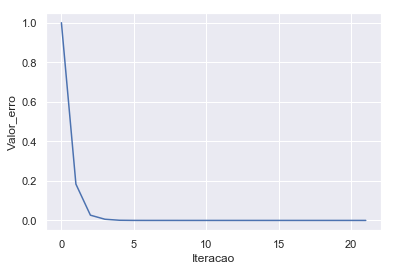

In [32]:
ax = sns.lineplot(x='Iteracao',y='Valor_erro',data=df.astype(dtype=float))

O gráfico acima mostra como a convergência do método de gauss seidel é rápida, mostrando que, em 21 iterações, foi possível de se obter um erro 0, além disso, percebe-se que nas primeiras iterações o valor do erro decai muito rápido

## Análisando o tempo de execução dos métodos

Tempo de execução da função 1 

In [29]:
tempo_execucao_func1

8.271338544075366e-05

Tempo de Execução da função 2

In [26]:
tempo_execucao_func2

0.0004902428392548064

In [63]:
df = pd.DataFrame(columns=['Eliminacao_de_Gauss','Gauss_Seidel'])
df.loc[0] = tempo_execucao_func1,tempo_execucao_func2


In [64]:
df

,Eliminacao_de_Gauss,Gauss_Seidel
0,0.000083,0.00049


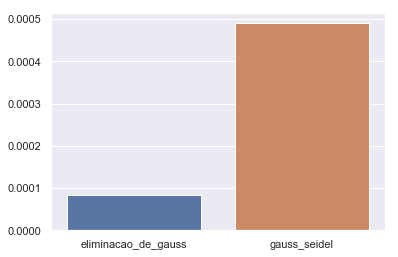

In [67]:
sns.barplot(x=['eliminacao_de_gauss','gauss_seidel'], y=[tempo_execucao_func1,tempo_execucao_func2])

Como também podemos notar, o tempo de execução do gauss seidel é relativamente mais alto que o metodo eliminacao de gauss